In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
train = pd.read_csv("train_black_friday.csv")
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
print('Shape of train data:', train.shape)

Shape of train data: (550068, 12)


In [73]:
test = pd.read_csv("test_black_friday.csv")
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
print('Shape of test data:', test.shape)

Shape of test data: (233599, 11)


### Null Values 

In [6]:
print("Null values in train data:")
train.isna().sum()

Null values in train data:


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [61]:
print("Null values in test data:")
test.isna().sum()

Null values in test data:


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

### Data Exploration

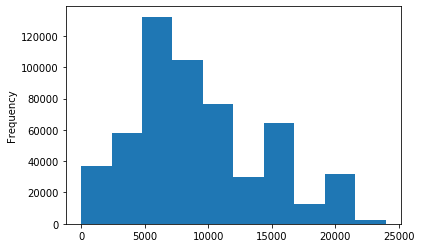

In [8]:
train['Purchase'].plot.hist()

In [9]:

def information(col):
    cat = train[col].unique() #obtaining the unique values/categories of the variable
    
    plt.suptitle("Information regarding col")
    
    plt.figure(figsize = (8,8))
    plt.subplot(211)
    train[col].value_counts().plot(kind = "bar", color = "crimson", edgecolor = "grey")
    plt.title(f"Frequency of different types of shoppers according to {col}")
    plt.show()
    #calculating the sales for each category
    tot = 0
    sales = []
    for i in cat:
        tot = train.loc[train[col] == i, 'Purchase'].sum()
        sales.append(tot)
   
    #plotting the results
    plt.figure(figsize = (8,8))
    plt.subplot(212)
    #plt.figure(figsize = (8,8))
    plt.bar(x = cat, height = sales, width = 0.8, color = "green", edgecolor = "black")
    plt.title(f"Sales for each of the categories of {col}")
    
    plt.show()

<Figure size 432x288 with 0 Axes>

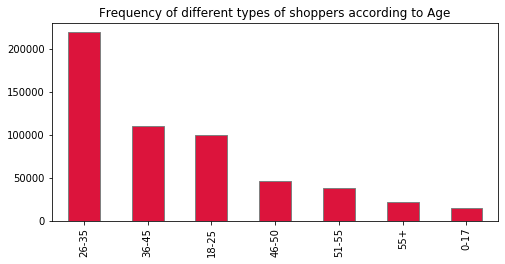

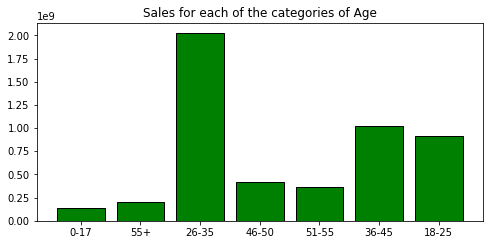

In [10]:
information('Age')

<Figure size 432x288 with 0 Axes>

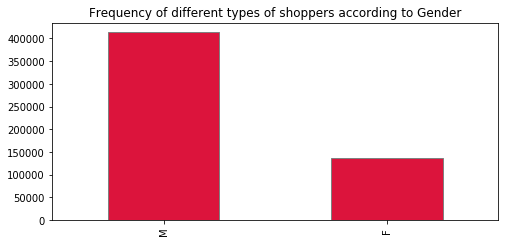

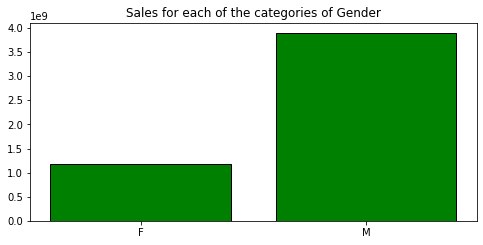

In [11]:
information('Gender')

<Figure size 432x288 with 0 Axes>

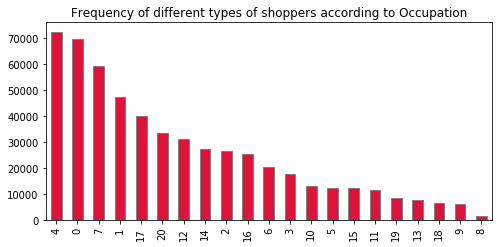

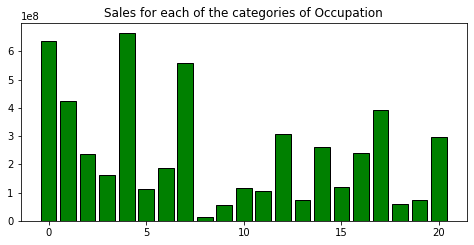

In [12]:
information('Occupation')

<Figure size 432x288 with 0 Axes>

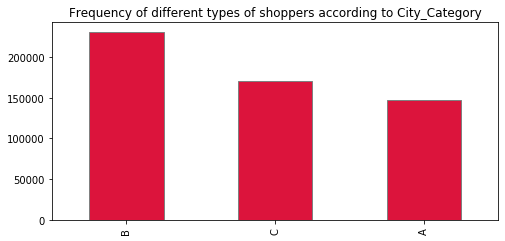

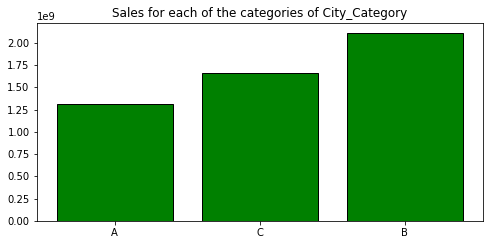

In [13]:
information('City_Category')

<Figure size 432x288 with 0 Axes>

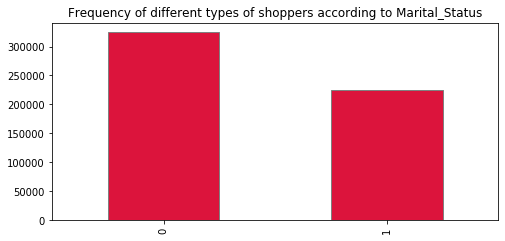

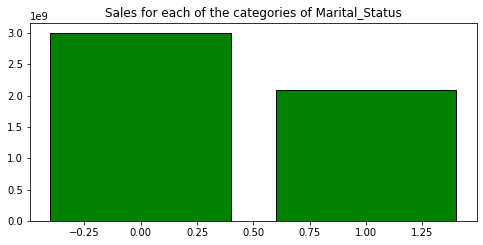

In [14]:
information('Marital_Status')

<Figure size 432x288 with 0 Axes>

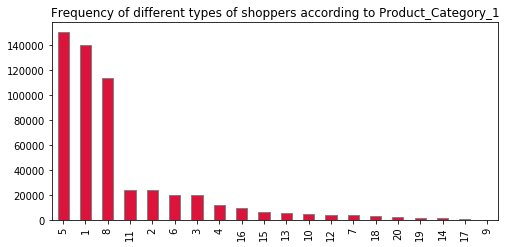

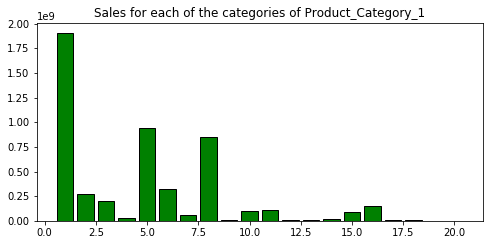

In [15]:
information("Product_Category_1")

<Figure size 432x288 with 0 Axes>

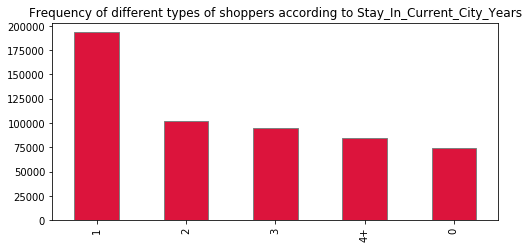

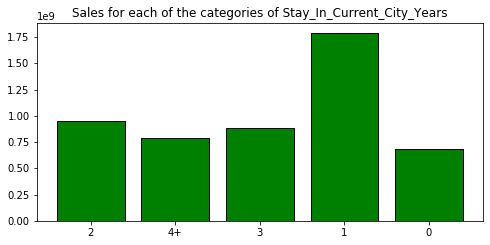

In [16]:
information('Stay_In_Current_City_Years')

In [17]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Imputing null values with -999

In [18]:
train = train.fillna(999)
#test = test.fillna(999)

### Changing the datatype of category features

In [19]:
cat_cols = ['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
train.loc[:, ['Product_Category_2', 'Product_Category_3']] = train.loc[:, ['Product_Category_2', 'Product_Category_3']].astype('int')
for i in cat_cols:
    train[i] = train[i].astype('category') #changing each column datatype to category
    test[i] = test[i].astype('category')

In [20]:
#train[train['Stay_In_Current_City_Years'] == '4+']['Stay_In_Current_City_Years'] == 4
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].replace(to_replace = '4+', value = '4')
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].astype('int')

In [21]:
train.dtypes

User_ID                          int64
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years       int32
Marital_Status                category
Product_Category_1            category
Product_Category_2            category
Product_Category_3            category
Purchase                         int64
dtype: object

### Adding Features

In [23]:
#Feature: Frequency of Product (Product_ID)
train['prod_freq'] = train['Product_ID'].map(dict(train['Product_ID'].value_counts()/len(train)))

In [24]:
#Feature: Frequency of user (User_ID)
train['user_freq'] = train['User_ID'].map(dict(train['User_ID'].value_counts()/len(train)))

In [25]:
#Feature: Frequency of Product_Category_1
train['pc1_freq'] = train['Product_Category_1'].map(dict(train['Product_Category_1'].value_counts()/len(train))).astype('float64')

In [26]:
train['prod_cat_2_isnull'] = train['Product_Category_2'] == 999
train['prod_cat_3_isnull'] = train['Product_Category_3'] == 999

In [27]:
train.columns
#train.new_col.value_counts()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'prod_freq',
       'user_freq', 'pc1_freq', 'prod_cat_2_isnull', 'prod_cat_3_isnull'],
      dtype='object')

train.loc[:, ['Product_ID', 'product_avg_sales', 'Purchase', 'Product_Category_2']]

In [28]:
from catboost import CatBoostRegressor
#train.fillna('-999', inplace=True)
#test.fillna('-999',inplace=True)

In [29]:
#train.Product_Category_2.head()

#pip install catboost

In [30]:
#train = train.drop(['user_avg_sales', 'product_avg_sales'], axis = 1)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,prod_freq,user_freq,pc1_freq,prod_cat_2_isnull,prod_cat_3_isnull
0,1000001,P00069042,F,0-17,10,A,2,0,3,999,999,8370,0.000413,0.000064,0.036746,True,True
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,0.001056,0.000064,0.255201,False,False
2,1000001,P00087842,F,0-17,10,A,2,0,12,999,999,1422,0.000185,0.000064,0.007175,True,True
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,999,1057,0.000620,0.000064,0.007175,False,True
4,1000002,P00285442,M,55+,16,C,4,0,8,999,999,7969,0.000369,0.000140,0.207111,True,True


train = train.drop('pc1_freq', axis = 1)

### Model Building

In [31]:
X = train.drop(['Purchase'], axis = 1)
y = train['Purchase']
X = X.set_index(['User_ID'])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 54)

In [33]:
categorical_features_indices = np.where(X.dtypes == 'category')[0]

In [260]:
#train.dtypes

In [37]:
model1 = CatBoostRegressor(iterations = 1000, 
                           depth = 4, 
                           learning_rate = 0.3, 
                           loss_function = 'RMSE', 
                           verbose = 100)
model1.fit(X_train, y_train, 
           cat_features = categorical_features_indices, 
           eval_set = (X_cv, y_cv),
          plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 4146.0806624	test: 4141.0884193	best: 4141.0884193 (0)	total: 415ms	remaining: 6m 54s
100:	learn: 2688.0416623	test: 2666.0330859	best: 2666.0330859 (100)	total: 32.6s	remaining: 4m 50s
200:	learn: 2662.6934547	test: 2642.5185432	best: 2642.5185432 (200)	total: 1m 5s	remaining: 4m 21s
300:	learn: 2645.2469349	test: 2627.2962904	best: 2627.2962904 (300)	total: 1m 40s	remaining: 3m 54s
400:	learn: 2634.8434499	test: 2619.9667807	best: 2619.9667807 (400)	total: 2m 18s	remaining: 3m 27s
500:	learn: 2624.3322812	test: 2611.4222179	best: 2611.4069055 (499)	total: 3m 3s	remaining: 3m 2s
600:	learn: 2615.3035154	test: 2604.4882886	best: 2604.4882886 (600)	total: 3m 39s	remaining: 2m 25s
700:	learn: 2607.4660576	test: 2598.7726249	best: 2598.7566750 (699)	total: 4m 19s	remaining: 1m 50s
800:	learn: 2601.6841936	test: 2595.5383653	best: 2595.5383653 (800)	total: 4m 56s	remaining: 1m 13s
900:	learn: 2595.9645792	test: 2591.6809440	best: 2591.6809440 (900)	total: 5m 32s	remaining: 36.6s


In [42]:
feat_imp = pd.DataFrame(model1.get_feature_importance(), X.columns)
print(feat_imp)

                                    0
Product_ID                   6.377123
Gender                       0.294981
Age                          0.930350
Occupation                   1.397645
City_Category                1.096547
Stay_In_Current_City_Years   0.771617
Marital_Status               0.193496
Product_Category_1          65.168996
Product_Category_2           1.361006
Product_Category_3           0.721325
prod_freq                    9.297941
user_freq                    4.145180
pc1_freq                     8.239464
prod_cat_2_isnull            0.004328
prod_cat_3_isnull            0.000000


In [41]:
model1.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCou

In [255]:
model1.evals_result_

{'learn': {'RMSE': [4306.111684073455,
   3843.8072257968847,
   3561.37355305665,
   3371.3618542776208,
   3218.28164536694,
   3120.5415711777205,
   3020.17150049825,
   2954.214124198877,
   2913.8522403420325,
   2882.539339628302,
   2856.8316765519403,
   2840.070227567983,
   2825.2821195041206,
   2817.51699870296,
   2808.0315997764637,
   2802.8637893206724,
   2798.507689784474,
   2794.7863758415992,
   2788.7476096722467,
   2784.3650511384626,
   2782.1477749481833,
   2780.443148773429,
   2777.8586217006405,
   2774.867770126524,
   2772.8497378594,
   2771.2903446258315,
   2770.031962026668,
   2768.4358756727684,
   2767.488122844223,
   2766.2124337251903,
   2765.3919181468473,
   2765.085367152708,
   2763.2360964305485,
   2761.841078862601,
   2760.5358114885985,
   2759.663754481265,
   2759.358803102681,
   2759.1047762997914,
   2758.883159676978,
   2758.6817213487566,
   2758.5042487356495,
   2756.92590595383,
   2756.7152320978685,
   2756.5832784737736

### Submission Procedure

In [74]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Feature: prob of category
no. of occurences of a category / total number of occurences

In [75]:
test.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [76]:
test = test.fillna(999)
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].replace('4+', '4').astype('int')
test['Product_Category_2'] = test['Product_Category_2'].astype('int')
test['Product_Category_3'] = test['Product_Category_3'].astype('int')

#Feature: Frequency of Product (Product_ID)
test['prod_freq'] = test['Product_ID'].map(dict(test['Product_ID'].value_counts()/len(test)))

#Feature: Frequency of user (User_ID)
test['user_freq'] = test['User_ID'].map(dict(test['User_ID'].value_counts()/len(test)))

#Feature: Frequency of Product_Category_1
test['pc1_freq'] = test['Product_Category_1'].map(dict(test['Product_Category_1'].value_counts()/len(test))).astype('float64')

test['prod_cat_2_isnull'] = test['Product_Category_2'] == 999
test['prod_cat_3_isnull'] = test['Product_Category_3'] == 999

test.columns
#test.new_col.value_counts()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'prod_freq', 'user_freq',
       'pc1_freq', 'prod_cat_2_isnull', 'prod_cat_3_isnull'],
      dtype='object')

In [84]:
#X = test.drop(['Purchase'], axis = 1)
#y = test['Purchase']
#test = test.set_index(['User_ID'])
#test = test.reset_index()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,prod_freq,user_freq,pc1_freq,prod_cat_2_isnull,prod_cat_3_isnull
User_ID,,,,,,,,,,,,,,,
1000004,P00128942,M,46-50,7,B,2,1,1,11,999,0.001699,0.000004,0.258225,False,True
1000009,P00113442,M,26-35,17,C,0,0,3,5,999,0.000501,0.000116,0.036721,False,True
1000010,P00288442,F,36-45,1,B,4,1,5,14,999,0.000321,0.000432,0.278327,False,True
1000010,P00145342,F,36-45,1,B,4,1,4,9,999,0.000034,0.000432,0.021417,False,True
1000011,P00053842,F,26-35,1,C,1,0,4,5,12,0.000916,0.000171,0.021417,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,P00118942,F,26-35,15,B,4,1,8,999,999,0.000321,0.000878,0.207060,True,True
1006036,P00254642,F,26-35,15,B,4,1,5,8,999,0.000295,0.000878,0.278327,False,True
1006036,P00031842,F,26-35,15,B,4,1,1,5,12,0.000334,0.000878,0.258225,False,False


In [93]:
submission = pd.DataFrame()
submission['User_ID'] = test.User_ID
submission['Product_ID'] = test.Product_ID
test = test.set_index(['User_ID'])
submission['Purchase'] = model1.predict(test)

In [99]:
submission = submission.reindex(columns = ['Purchase', 'User_ID', 'Product_ID'])

In [100]:
print(submission.head())
print(submission.shape)

       Purchase  User_ID Product_ID
0  16123.803462  1000004  P00128942
1  11648.596956  1000009  P00113442
2   5917.898638  1000010  P00288442
3   1707.479343  1000010  P00145342
4   2100.287484  1000011  P00053842
(233599, 3)


In [103]:
submission.to_csv('blackfri_0107_1.csv', index = False)